[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1nmRz-pOLEc0zjeG6MIaqtMXgdql4wpi0?usp=sharing)

# 1.2 - Data Exploration

## Info Userdata

This notebook provides the in depth analysis on the student performance in exams at public schools.

**Info_UserData.csv**

This table contains the metadata for the **72,758** select users for this dataset

All of the select users are students who meet the following filtering criteria:

The registered date is between `2018-08-01` and `2019-07-31`
User grade is between `1` and `12`
User city is not null
Energy Points are earned from Junyi Academy after completing exercises, watching videos, and when the user receives a badge.

A user earns 750 * (effective watching time / video length) energy points after watching a video.
(Effective watching time for a 10-minute video at 2X speed will be only 5-minute)

A user earns a base of 75 energy points after completing an exercise at level 0.
(Details of the leveling system will be described in the Proficiency Mechanism Section in Log_Problem's description)

This might increase to at most 225 due to fast answering speed or repeated correct attempts.
The points earned will decrease to as few as 5 as the user's level of that exercise increase to encourage the user to practice other exercises.

The users might have teachers that can assign exercises to a student and look at the progress and results of the assignments.
The student can also add himself/herself as a teacher of their own or other students.
Classes are a group of students with a certain teacher.

| Variable Name | Description |
|:-|:-|
| uuid | The unique ID of this user |
| gender | The gender of this user. There are four possible values: `male`, `female`, `unspecified` and `null`. |
| points | The user will receive energy points from the Junyi Academy after completing exercises, watching videos, and when the user receives a badge. |
| badges_cnt | Badges are awarded to the users when the user achieves certain conditions. |
| first_login_date_TW | The first login date after the user registers to Junyi Academy. |
| user_grade | The grade of the user. The possible values are between 1 and 12. |
| user_city | The resident city of the user. |
| has_teacher_cnt | The number of teachers this user has in the Junyi Academy. |
| is_self_coach | Does the user add himself/herself as a teacher of their own? |
| has_student_cnt | The number of students this user has in the Junyi Academy. Despite the user role of this user is a student, this user can still add another user as a student. |
| belongs_to_class_cnt | The number of classes this user belongs to. |
| has_class_cnt | The number of classes this user created to add other users. Despite the user role of this user is a student, this user can still create a class to add other users in. |

## Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt

In [3]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [20]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## Loading Data

In [4]:
%%time
info_userdata_raw_df = pd.read_csv('../data/raw/Info_Userdata.csv', index_col='uuid')

Wall time: 156 ms


In [5]:
info_userdata_raw_df.head()

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


From the look of above table, the gender column has some null values

Let’s have a look at data dimensionality, feature names, and feature types.

In [6]:
info_userdata_raw_df.shape

(72758, 11)

From the output, we can see that the table contains 1330 rows and 9 columns.

Now let's try printing out column names using columns:

In [7]:
info_userdata_raw_df.columns

Index(['gender', 'points', 'badges_cnt', 'first_login_date_TW', 'user_grade',
       'user_city', 'has_teacher_cnt', 'is_self_coach', 'has_student_cnt',
       'belongs_to_class_cnt', 'has_class_cnt'],
      dtype='object')

In [8]:
info_userdata_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72758 entries, Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ= to hkZZTOTi9MpjU38ctwOSK3O4g12JZt2ykeYS7nJsJkc=
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                32905 non-null  object
 1   points                72758 non-null  int64 
 2   badges_cnt            72758 non-null  int64 
 3   first_login_date_TW   72758 non-null  object
 4   user_grade            72758 non-null  int64 
 5   user_city             72758 non-null  object
 6   has_teacher_cnt       72758 non-null  int64 
 7   is_self_coach         72758 non-null  bool  
 8   has_student_cnt       72758 non-null  int64 
 9   belongs_to_class_cnt  72758 non-null  int64 
 10  has_class_cnt         72758 non-null  int64 
dtypes: bool(1), int64(7), object(3)
memory usage: 6.2+ MB


object, int64 and bool is the data types of our features. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 1330 observations, the same number of rows we saw before with shape.

In [9]:
info_userdata_raw_df['is_self_coach'] = info_userdata_raw_df['is_self_coach'].astype('int64')

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [10]:
info_userdata_raw_df.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,6.304759e+04,9.543789,5.620715,0.884810,0.008205,0.203304,0.873306,0.046442
std,1.242042e+05,19.036328,2.041178,1.552795,0.090211,6.413944,1.961188,0.315060
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.040000e+04,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.531375e+04,10.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.047528e+06,760.000000,12.000000,106.000000,1.000000,966.000000,120.000000,24.000000


The datatypes have to indicate in the `include` parameter to see statistics on non-numerical features. Object parameter has been indicated to see the statistics on the object features.

In [11]:
info_userdata_raw_df.describe(include=['object'])

,gender,first_login_date_TW,user_city
count,32905,72758,72758
unique,3,365,20
top,female,2018-08-31,tp
freq,13099,1008,12494


For categorical (type object) feature we can use the `value_counts` method. Let's have a look at the distribution of Churn:

In [12]:
info_userdata_raw_df['first_login_date_TW'].value_counts().sort_values(ascending=False)

2018-08-31    1008
2018-09-20     926
2018-09-11     888
2018-09-13     865
2018-09-10     862
              ... 
2019-02-03      29
2019-02-06      25
2019-02-04      24
2019-02-05      20
2019-02-02      20
Name: first_login_date_TW, Length: 365, dtype: int64

Some content_pretty_name has the frequency of 2.

In [13]:
info_userdata_raw_df['user_city'].value_counts().head()

tp      12494
ntpc    10808
tc      10710
ty       7615
kh       6888
Name: user_city, dtype: int64

In [14]:
info_userdata_raw_df['user_city'].value_counts(normalize=True).head()

tp      0.171720
ntpc    0.148547
tc      0.147200
ty      0.104662
kh      0.094670
Name: user_city, dtype: float64

1330 records are the kind of exercise. The current dataset release only includes `Exercise`. The `content_kind` column can be drop since all rows have the same values.

In [15]:
info_userdata_raw_df['is_self_coach'].value_counts()

0    72161
1      597
Name: is_self_coach, dtype: int64

In [16]:
info_userdata_raw_df['is_self_coach'].value_counts(normalize=True)

0    0.991795
1    0.008205
Name: is_self_coach, dtype: float64

835 problems are easy, 305 problems are normal, 149 problems are hard difficulty and 41 problems are unset.

In [19]:
plotCorrelationMatrix(info_userdata_raw_df, 8)

AttributeError: 'DataFrame' object has no attribute 'dataframeName'

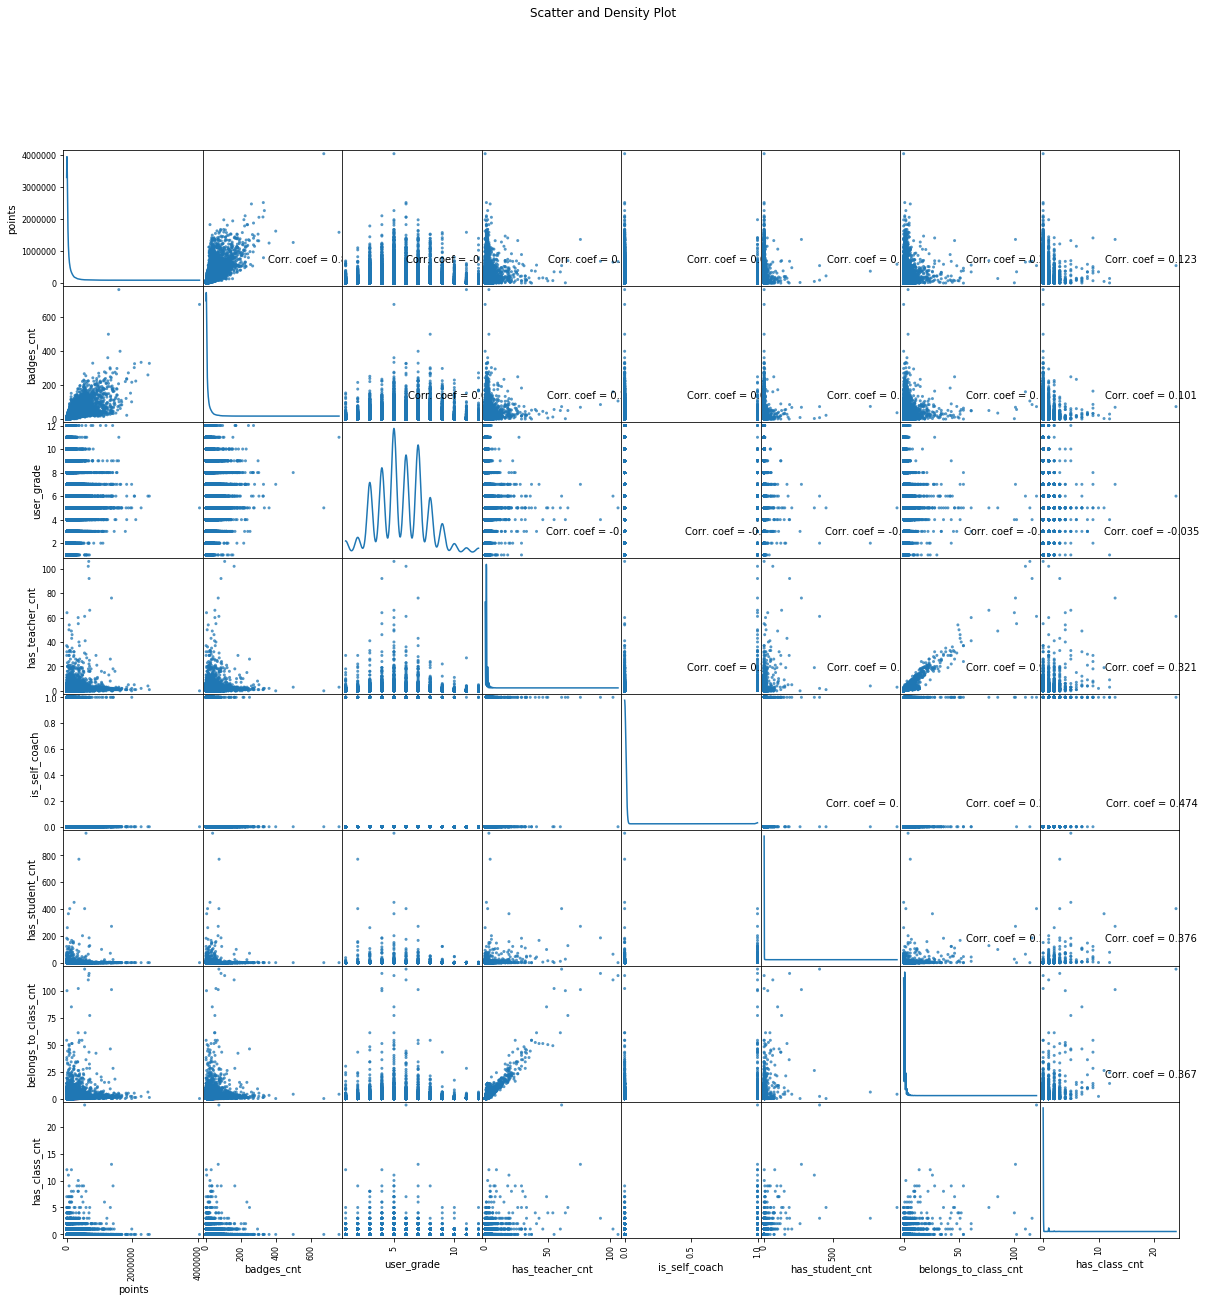

In [21]:
plotScatterMatrix(info_userdata_raw_df, 20, 10)